In [58]:
#from __future__ import absolute_import, division, print_function, unicode_literals
#from __future__ import absolute_import, division, print_function
import numpy as np
import tensorflow as tf
#import tensorflow.contrib.eager as tfe
import pandas as pd
import matplotlib.pyplot as plt
rng = np.random

In [59]:
#this section needed to enable iteration over tensor flow dataset

# Set Eager API
#print("Setting Eager mode...")
#tf.enable_eager_execution()
#tfe = tf.contrib.eager

In [60]:
# Parameters
learning_rate = 0.000000001
training_epochs = 25000
display_step = 250

In [61]:
test_file_path='../mtcars.csv'

In [62]:
cars = pd.read_csv(test_file_path)
yv=cars['mpg'].to_numpy()
xv=cars['hp'].to_numpy()

xvsq=cars['hp'].pow(2)
yvsq=cars['mpg'].pow(2)

xyv=cars['hp']*cars['mpg']

sumxv=cars['hp'].sum()
sumyv=cars['mpg'].sum()

sumxvsq=xvsq.sum()
sumyvsq=yvsq.sum()

sumxy=xyv.sum()

#print(xyv)

#print(xvsq)
#print(yvsq)

print(sumxv)
print(sumyv)

print(sumxvsq)
print(sumyvsq)

print(sumxy)

4694
642.9000000000001
834278
14042.31
84362.70000000001


In [63]:
beta=(sumxy-(sumxv*sumyv)/n_samples)/(sumxvsq-(sumxv*sumxv)/n_samples)

alpha=(sumyv/n_samples)-beta*(sumyv/n_samples)

print(beta,alpha)

-0.06822827807156372 21.461373749131514


In [64]:
ypredv=beta * xv + alpha+4.9



#print(ypredv)

top=(ypredv-(sumyv/n_samples))**2

bot=(yv-(sumyv/n_samples))**2

#print(top,bot)

R=(top.sum())/(bot.sum())

print(R)



0.9994028018887333


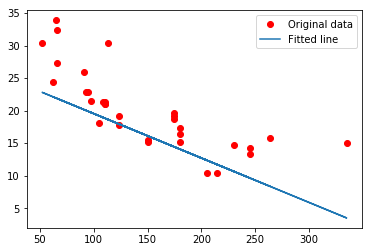

In [65]:



#Graphic display
plt.plot(xv, yv, 'ro', label='Original data')
plt.plot(xv, beta * xv + alpha+4.9, label='Fitted line')
plt.legend()
plt.show()

In [66]:
n_samples = xv.shape[0]

In [67]:
print(n_samples)

32


In [68]:
print(np.size(xv))

32


In [78]:
# tf Graph Input
X = tf.placeholder("float64")
Y = tf.placeholder("float64")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")
print(W,b)
W = tf.Variable(beta, name="weight")
b = tf.Variable(alpha+4.9, name="bias")

print(W,b)

<tf.Variable 'weight_7:0' shape=() dtype=float32_ref> <tf.Variable 'bias_7:0' shape=() dtype=float32_ref>
<tf.Variable 'weight_8:0' shape=() dtype=float64_ref> <tf.Variable 'bias_8:0' shape=() dtype=float64_ref>


In [79]:
# Construct a linear model


pred = tf.add(tf.multiply(X, W), b)

#print(pred)
#print(np.size(pred))
#print(pred[0])

In [80]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

print(tf.cast(cost,tf.float64))
print()

tf.print(cost,output_stream="file://test.out")
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Tensor("truediv_2:0", shape=(), dtype=float64)



In [81]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [82]:
tensor = tf.range(10)
tf.print("tensors:", tensor, {2: tensor * 2})
print(tensor[1])
print(tensor.shape)

Tensor("strided_slice_1:0", shape=(), dtype=int32)
(10,)


Epoch: 0250 cost= 13.904656349 W= -0.06809166266606774 b= 26.361374680998683
Epoch: 0500 cost= 13.830964727 W= -0.06795593483111224 b= 26.36137560787219
Epoch: 0750 cost= 13.758227517 W= -0.0678210888003192 b= 26.361376529784234
Epoch: 1000 cost= 13.686432356 W= -0.06768711884477276 b= 26.361377446766944
Epoch: 1250 cost= 13.615567044 W= -0.06755401927277602 b= 26.361378358852495
Epoch: 1500 cost= 13.545619538 W= -0.06742178442961144 b= 26.36137926607246
Epoch: 1750 cost= 13.476577951 W= -0.06729040869729822 b= 26.361380168458897
Epoch: 2000 cost= 13.408430550 W= -0.06715988649435645 b= 26.36138106604274
Epoch: 2250 cost= 13.341165755 W= -0.06703021227556465 b= 26.361381958855564
Epoch: 2500 cost= 13.274772133 W= -0.06690138053173073 b= 26.361382846928233
Epoch: 2750 cost= 13.209238403 W= -0.06677338578945279 b= 26.36138373029162
Epoch: 3000 cost= 13.144553427 W= -0.06664622261088966 b= 26.361384608976085
Epoch: 3250 cost= 13.080706213 W= -0.06651988559352848 b= 26.3613854830122
Epoch:

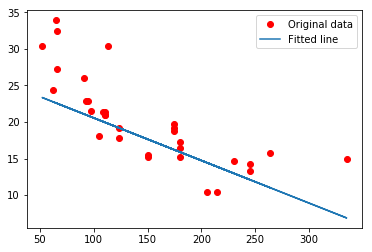

In [83]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(xv, yv):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: xv, Y:yv})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: xv, Y: yv})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(xv, yv, 'ro', label='Original data')
    plt.plot(xv, sess.run(W) * xv + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

-0.058158097 26.36144673


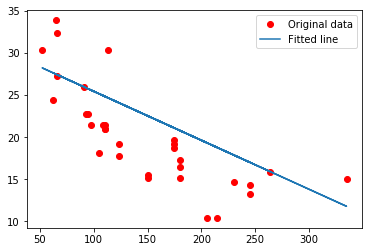

In [86]:
#Graphic display

beta=-0.058158097
alpha=26.36144673

print(beta,alpha)

plt.plot(xv, yv, 'ro', label='Original data')
plt.plot(xv, beta * xv + alpha+4.9, label='Fitted line')
plt.legend()
plt.show()